In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


Para aplicar as técnicas discutidas em conjuntos de dados reais, usaremos os conjuntos de dados disponíveis na biblioteca `sklearn`. Utilizaremos os dados de diabetes e câncer de mama para as demonstrações. Vamos apresentar o código para cada técnica, incluindo a plotagem de gráficos para demonstrar os efeitos.

### 1.3 Discretização de variáveis contínuas por meio de quantização com bins fixos

#### Exemplo: Conjunto de dados de Diabetes

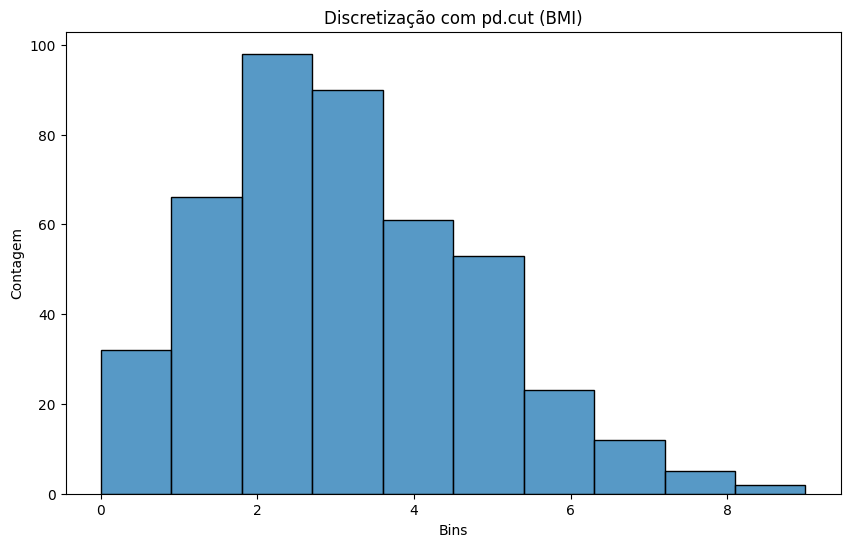

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Carregar dados de Diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target
feature_names = diabetes.feature_names

# Selecionar uma feature contínua
feature_index = 2  # por exemplo, o índice 2 corresponde à feature "bmi"
feature_data = data[:, feature_index]

# Discretização com bins fixos usando pd.cut
df = pd.DataFrame({'valor': feature_data})
df['binned'] = pd.cut(df['valor'], bins=10, labels=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['binned'], bins=10, kde=False)
plt.title('Discretização com pd.cut (BMI)')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

### 1.4 Discretização de variáveis contínuas por meio de quantização com bins variáveis

#### Exemplo: Conjunto de dados de Câncer de Mama

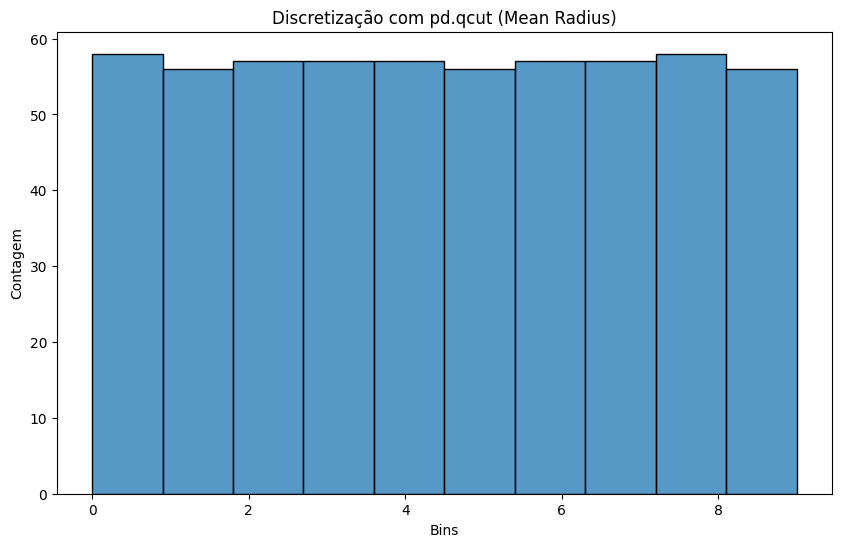

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

# Selecionar uma feature contínua
feature_index = 0  # por exemplo, o índice 0 corresponde à feature "mean radius"
feature_data = data[:, feature_index]

# Discretização com bins variáveis usando pd.qcut
df = pd.DataFrame({'valor': feature_data})
df['binned'] = pd.qcut(df['valor'], q=10, labels=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['binned'], bins=10, kde=False)
plt.title('Discretização com pd.qcut (Mean Radius)')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

### 1.5 Utilizar a FunctionTransformer do sklearn em uma variável

#### Exemplo: Conjunto de dados de Diabetes (Aplicação de Logaritmo Natural)

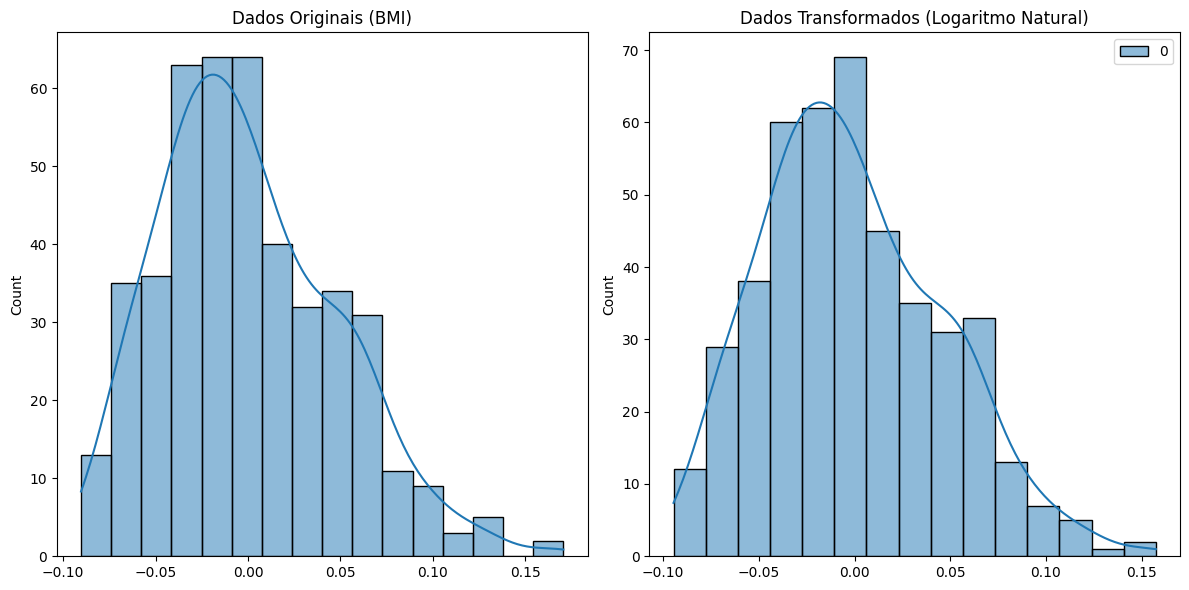

In [4]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Carregar dados de Diabetes
diabetes = load_diabetes()
data = diabetes.data
feature_index = 2  # por exemplo, o índice 2 corresponde à feature "bmi"
feature_data = data[:, feature_index]

# Função de exemplo: logaritmo natural
def log_transform(x):
    return np.log1p(x)

# Aplicação do FunctionTransformer
transformer = FunctionTransformer(log_transform)
data_transformed = transformer.fit_transform(feature_data.reshape(-1, 1))

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (BMI)')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Logaritmo Natural)')

plt.tight_layout()
plt.show()

### 1.6 Utilizar a PowerTransformer do sklearn em uma variável

#### Exemplo: Conjunto de dados de Câncer de Mama

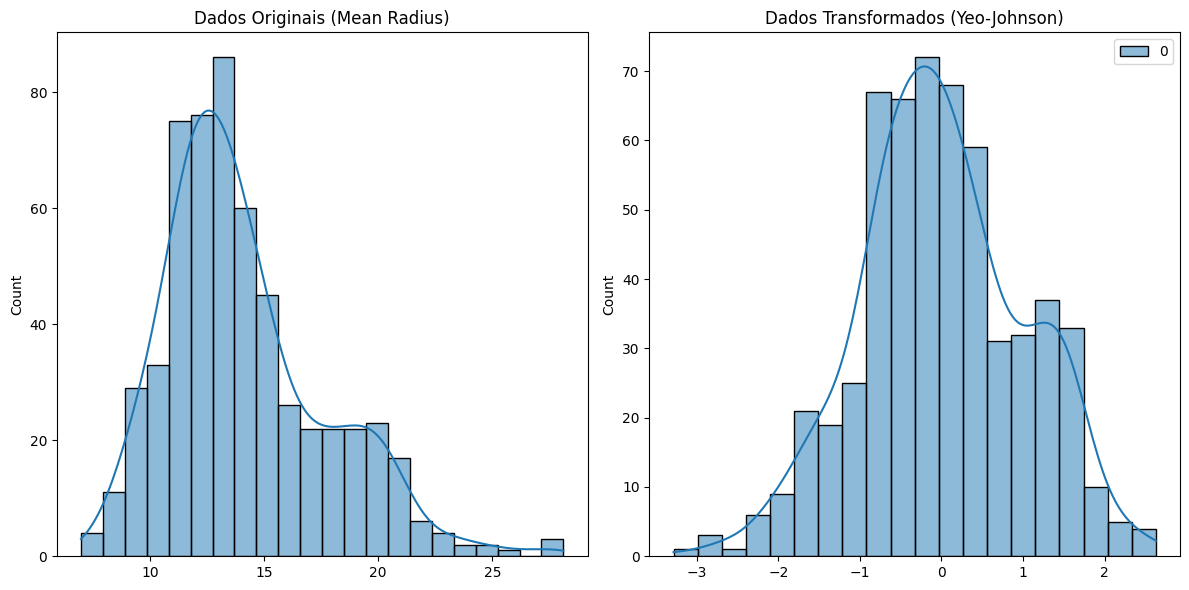

In [5]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
data = cancer.data
feature_index = 0  # por exemplo, o índice 0 corresponde à feature "mean radius"
feature_data = data[:, feature_index]

# Aplicação do PowerTransformer com método 'yeo-johnson'
transformer = PowerTransformer(method='yeo-johnson')
data_transformed = transformer.fit_transform(feature_data.reshape(-1, 1))

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (Mean Radius)')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Yeo-Johnson)')

plt.tight_layout()
plt.show()

### 1.7 Utilizar a normalização Min-Max do sklearn para garantir que os dados estão na mesma faixa-dinâmica

#### Exemplo: Conjunto de dados de Diabetes

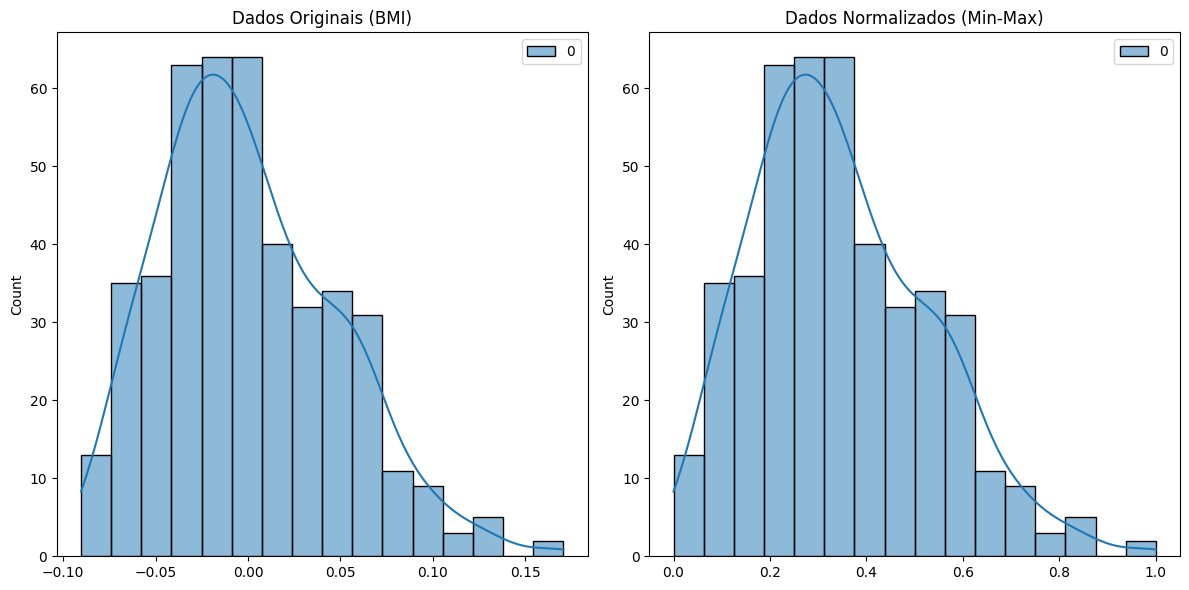

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Carregar dados de Diabetes
diabetes = load_diabetes()
data = diabetes.data
feature_index = 2  # por exemplo, o índice 2 corresponde à feature "bmi"
feature_data = data[:, feature_index].reshape(-1, 1)

# Aplicação do Min-Max Scaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(feature_data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (BMI)')

plt.subplot(1, 2, 2)
sns.histplot(data_normalized, kde=True)
plt.title('Dados Normalizados (Min-Max)')

plt.tight_layout()
plt.show()

### 1.8 Utilizar a normalização Standard Scaler

#### Exemplo: Conjunto de dados de Câncer de Mama

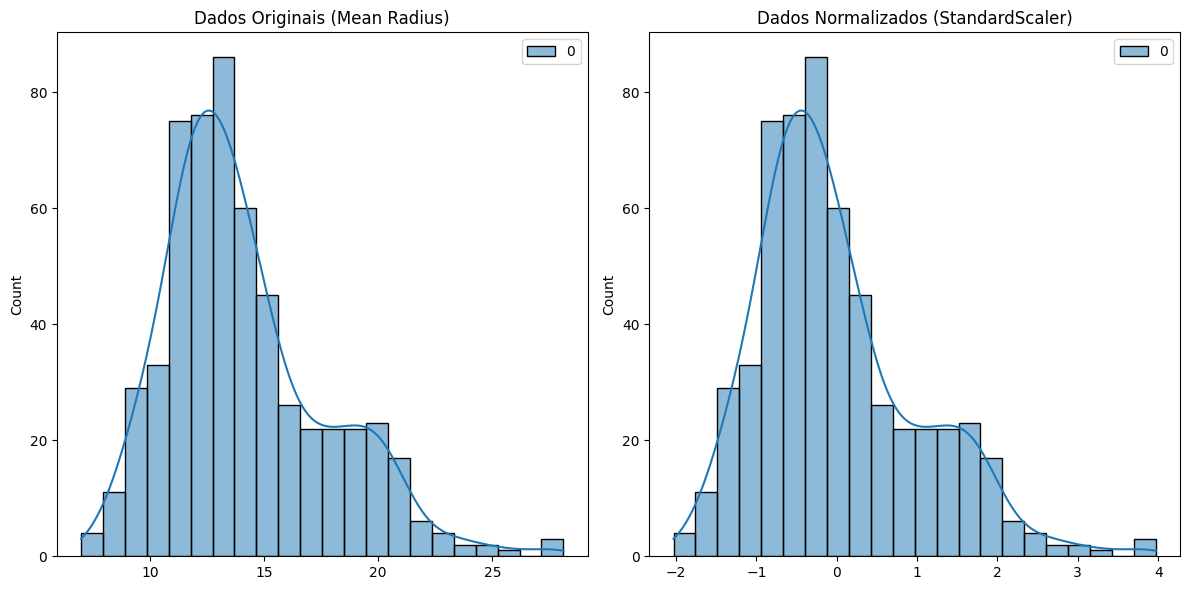

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
data = cancer.data
feature_index = 0  # por exemplo, o índice 0 corresponde à feature "mean radius"
feature_data = data[:, feature_index].reshape(-1, 1)

# Aplicação do StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(feature_data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (Mean Radius)')

plt.subplot(1, 2, 2)
sns.histplot(data_standardized, kde=True)
plt.title('Dados Normalizados (StandardScaler)')

plt.tight_layout()
plt.show()

### 1.9 Utilizar a regularização norma-l2

#### Exemplo: Conjunto de dados de Diabetes

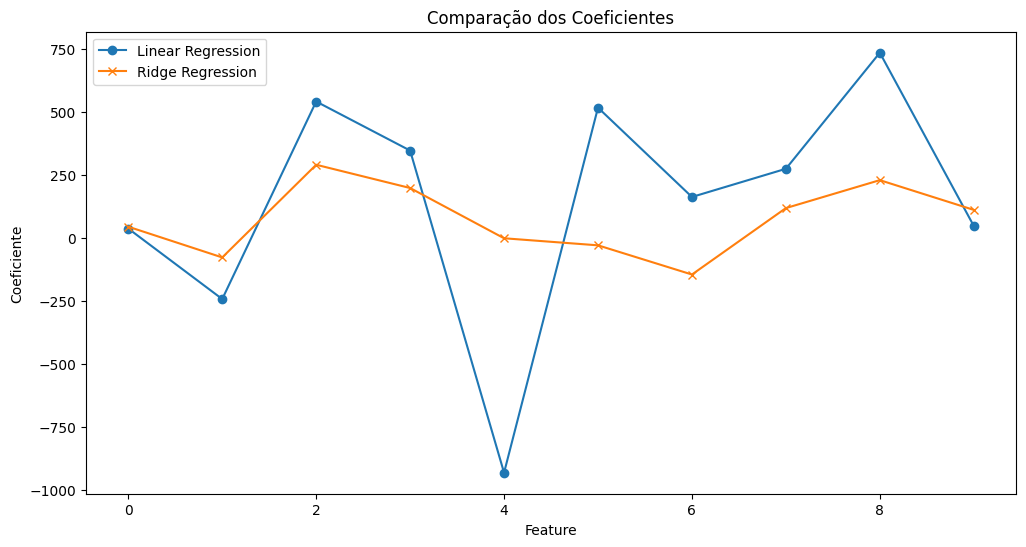

In [8]:
from sklearn.linear_model import Ridge, LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Carregar dados de Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação da Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Aplicação da Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Gráfico
coef_lr = model_lr.coef_
coef_ridge = model_ridge.coef_

plt.figure(figsize=(12, 6))
plt.plot(coef_lr, label='Linear Regression', marker='o')
plt.plot(coef_ridge, label='Ridge Regression', marker='x')
plt.title('Comparação dos Coeficientes')
plt.xlabel('Feature')
plt.ylabel('Coeficiente')
plt.legend()
plt.show()

### 1.10 Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

#### Exemplo: Conjunto de dados de Câncer de Mama

**Filtragem com `SelectKBest` e ANOVA F-test**

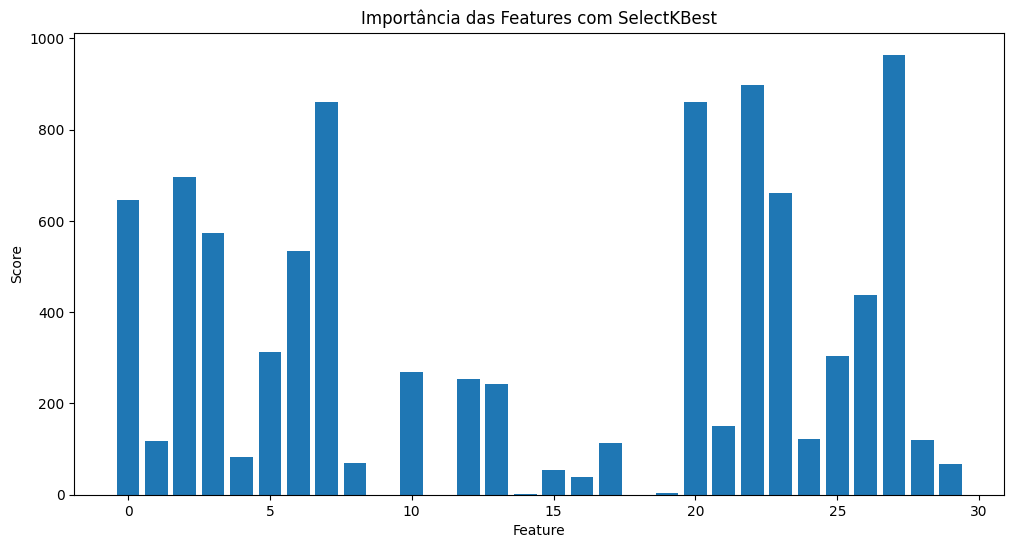

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Aplicação do SelectKBest com ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Gráfico
scores = selector.scores_

plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores)
plt.title('Importância das Features com SelectKBest')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()

### Conclusão

Os exemplos apresentados utilizam conjuntos de dados reais para demonstrar como as diferentes técnicas de manipulação de dados numéricos afetam a distribuição e seleção das features. Vamos continuar com as técnicas de Wrapper e Embedding.

### 1.10 Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

#### Wrapper com `RFE` e `LogisticRegression`

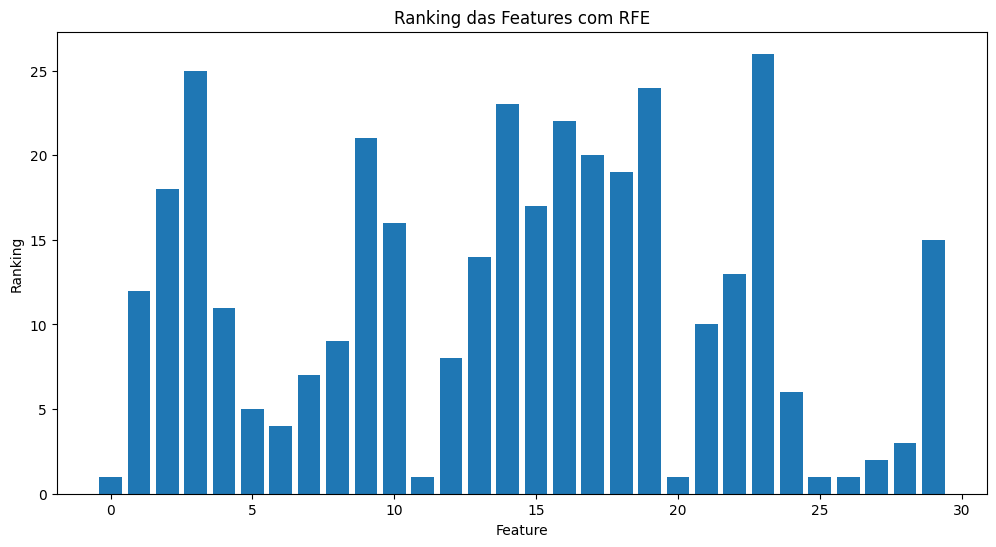

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Aplicação do RFE
model = LogisticRegression(max_iter=10000)
selector = RFE(model, n_features_to_select=5)
X_new = selector.fit_transform(X, y)

# Gráfico
ranking = selector.ranking_

plt.figure(figsize=(12, 6))
plt.bar(range(len(ranking)), ranking)
plt.title('Ranking das Features com RFE')
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.show()

#### Embedding com `RandomForestClassifier`

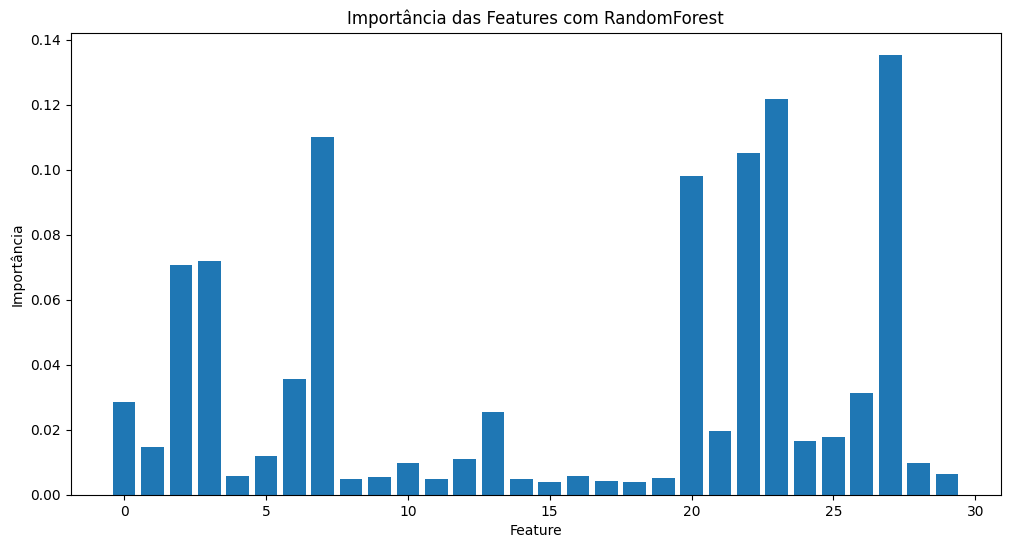

In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Aplicação do RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.title('Importância das Features com RandomForest')
plt.xlabel('Feature')
plt.ylabel('Importância')
plt.show()

### Explicações Detalhadas

#### Discretização de variáveis contínuas por meio de quantização com bins fixos

**Exemplo: Conjunto de dados de Diabetes**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Diabetes do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "bmi".
3. **Discretização com bins fixos**: Usamos `pd.cut` para dividir os dados em 10 bins de tamanho igual.
4. **Plotagem**: Utilizamos um histograma para visualizar a distribuição dos dados discretizados.

#### Discretização de variáveis contínuas por meio de quantização com bins variáveis

**Exemplo: Conjunto de dados de Câncer de Mama**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "mean radius".
3. **Discretização com bins variáveis**: Usamos `pd.qcut` para dividir os dados em 10 bins com aproximadamente o mesmo número de pontos de dados.
4. **Plotagem**: Utilizamos um histograma para visualizar a distribuição dos dados discretizados.

#### Utilização da FunctionTransformer do sklearn em uma variável

**Exemplo: Conjunto de dados de Diabetes (Aplicação de Logaritmo Natural)**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Diabetes do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "bmi".
3. **Transformação com logaritmo natural**: Definimos uma função para aplicar o logaritmo natural e usamos `FunctionTransformer` para aplicar a função aos dados.
4. **Plotagem**: Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

#### Utilização da PowerTransformer do sklearn em uma variável

**Exemplo: Conjunto de dados de Câncer de Mama**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "mean radius".
3. **Transformação com PowerTransformer**: Usamos `PowerTransformer` com o método 'yeo-johnson' para transformar os dados.
4. **Plotagem**: Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

#### Utilização da normalização Min-Max do sklearn

**Exemplo: Conjunto de dados de Diabetes**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Diabetes do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "bmi".
3. **Normalização Min-Max**: Usamos `MinMaxScaler` para transformar os dados para a faixa entre 0 e 1.
4. **Plotagem**: Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

#### Utilização da normalização Standard Scaler

**Exemplo: Conjunto de dados de Câncer de Mama**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "mean radius".
3. **Normalização StandardScaler**: Usamos `StandardScaler` para transformar os dados para que tenham média 0 e desvio padrão 1.
4. **Plotagem**: Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

#### Utilização da regularização norma-l2

**Exemplo: Conjunto de dados de Diabetes**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Diabetes do `sklearn`.
2. **Divisão em treino e teste**: Dividimos os dados em conjuntos de treino e teste.
3. **Aplicação de Ridge e Linear Regression**: Aplicamos `LinearRegression` e `Ridge` com `alpha=1.0`.
4. **Plotagem**: Comparamos os coeficientes dos dois modelos em um gráfico.

#### Seleção das features úteis

**Filtragem com `SelectKBest` e ANOVA F-test**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Aplicação do SelectKBest**: Usamos `SelectKBest` com o teste ANOVA F para selecionar as 5 melhores features.
3. **Plotagem**: Visualizamos os scores das features em um gráfico de barras.

**Wrapper com `RFE` e `LogisticRegression`**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Aplicação do RFE**: Usamos `RFE` com `LogisticRegression` para selecionar as 5 melhores features.
3. **Plotagem**: Visualizamos o ranking das features em um gráfico de barras.

**Embedding com `RandomForestClassifier`**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Aplicação do RandomForestClassifier**: Usamos `RandomForestClassifier` para treinar o modelo e extrair as importâncias das features.
3. **Plotagem**: Visualizamos as importâncias das features em um gráfico de barras.

### Conclusão

Os exemplos apresentados utilizam conjuntos de dados reais para demonstrar como as diferentes técnicas de manipulação de dados numéricos afetam a distribuição e a seleção das features nos conjuntos de dados. Cada técnica tem seu propósito específico e pode ser escolhida com base nas características dos dados e nos objetivos do modelo de machine learning.

Vamos continuar com a aplicação de outras técnicas de manipulação de dados em conjuntos de dados reais e apresentar os gráficos para a visualização dos resultados.

### 1.4 Discretização de variáveis contínuas por meio de quantização com bins variáveis

#### Exemplo: Conjunto de dados de Diabetes

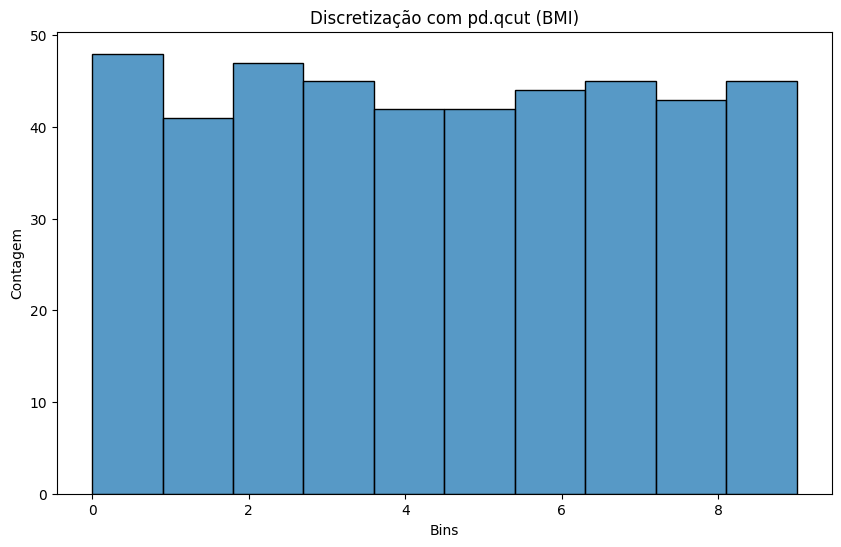

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Carregar dados de Diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target
feature_names = diabetes.feature_names

# Selecionar uma feature contínua
feature_index = 2  # por exemplo, o índice 2 corresponde à feature "bmi"
feature_data = data[:, feature_index]

# Discretização com bins variáveis usando pd.qcut
df = pd.DataFrame({'valor': feature_data})
df['binned'] = pd.qcut(df['valor'], q=10, labels=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['binned'], bins=10, kde=False)
plt.title('Discretização com pd.qcut (BMI)')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

### 1.5 Utilizar a FunctionTransformer do sklearn em uma variável

#### Exemplo: Conjunto de dados de Câncer de Mama (Aplicação de raiz quadrada)

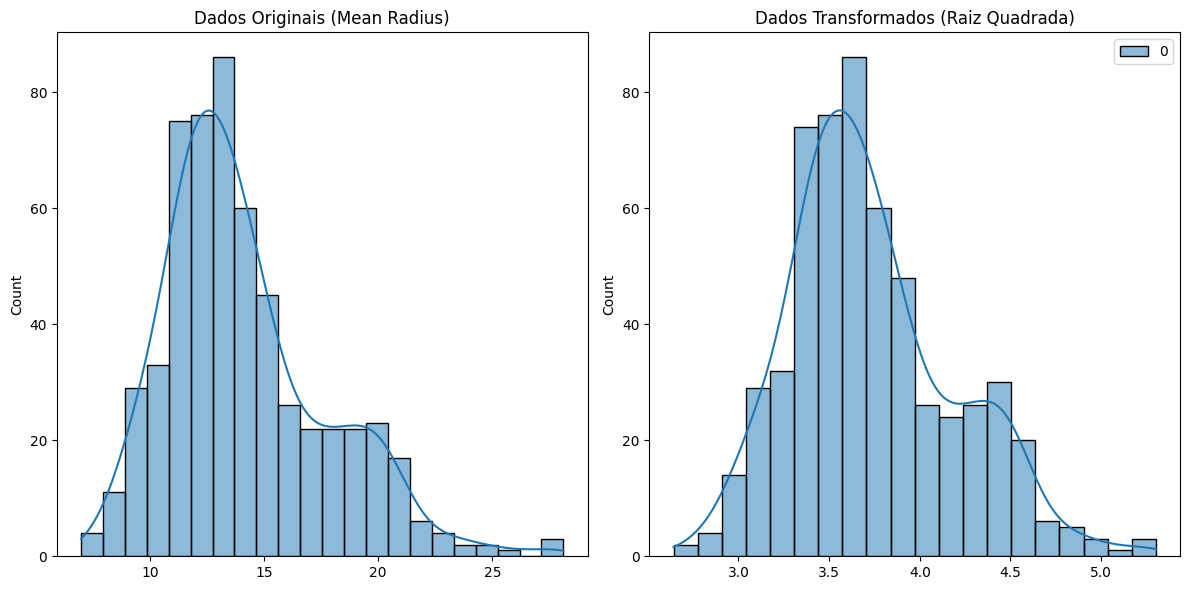

In [13]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
data = cancer.data
feature_index = 0  # por exemplo, o índice 0 corresponde à feature "mean radius"
feature_data = data[:, feature_index]

# Função de exemplo: raiz quadrada
def sqrt_transform(x):
    return np.sqrt(x)

# Aplicação do FunctionTransformer
transformer = FunctionTransformer(sqrt_transform)
data_transformed = transformer.fit_transform(feature_data.reshape(-1, 1))

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (Mean Radius)')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Raiz Quadrada)')

plt.tight_layout()
plt.show()

### 1.6 Utilizar a PowerTransformer do sklearn em uma variável

#### Exemplo: Comparação entre métodos 'yeo-johnson' e 'box-cox' no conjunto de dados de Diabetes

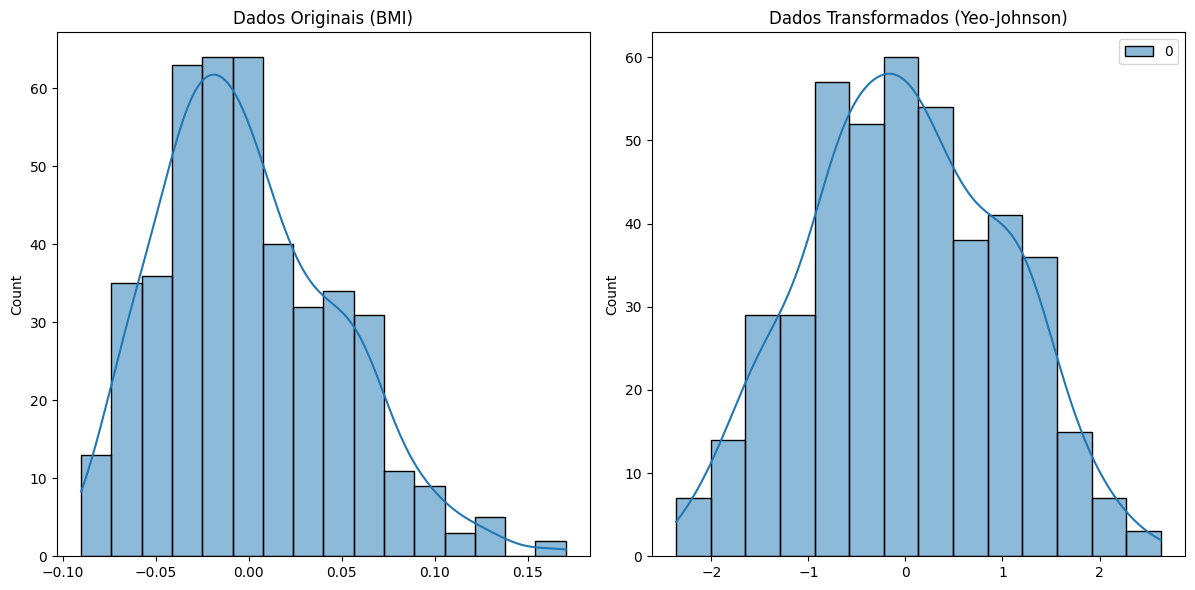

In [2]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Carregar dados de Diabetes
diabetes = load_diabetes()
data = diabetes.data
feature_index = 2  # por exemplo, o índice 2 corresponde à feature "bmi"
feature_data = data[:, feature_index]

# Aplicação do PowerTransformer com método 'yeo-johnson'
transformer_yeo_johnson = PowerTransformer(method='yeo-johnson')
data_yeo_johnson = transformer_yeo_johnson.fit_transform(feature_data.reshape(-1, 1))

# # Aplicação do PowerTransformer com método 'box-cox'
# transformer_box_cox = PowerTransformer(method='box-cox')
# data_box_cox = transformer_box_cox.fit_transform(feature_data.reshape(-1, 1))

# Gráficos
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (BMI)')

plt.subplot(1, 3, 2)
sns.histplot(data_yeo_johnson, kde=True)
plt.title('Dados Transformados (Yeo-Johnson)')

# plt.subplot(1, 3, 3)
# sns.histplot(data_box_cox, kde=True)
# plt.title('Dados Transformados (Box-Cox)')

plt.tight_layout()
plt.show()

### 1.7 Utilizar a normalização Min-Max do sklearn para garantir que os dados estão na mesma faixa-dinâmica

#### Exemplo: Conjunto de dados de Câncer de Mama

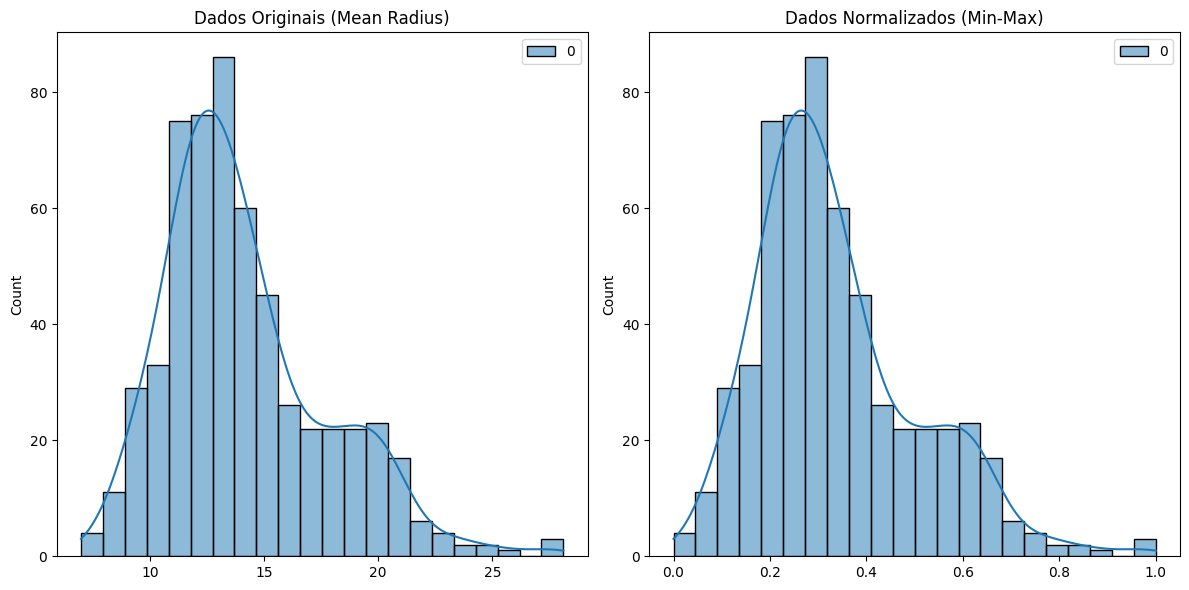

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
data = cancer.data
feature_index = 0  # por exemplo, o índice 0 corresponde à feature "mean radius"
feature_data = data[:, feature_index].reshape(-1, 1)

# Aplicação do Min-Max Scaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(feature_data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (Mean Radius)')

plt.subplot(1, 2, 2)
sns.histplot(data_normalized, kde=True)
plt.title('Dados Normalizados (Min-Max)')

plt.tight_layout()
plt.show()

### 1.8 Utilizar a normalização Standard Scaler

#### Exemplo: Conjunto de dados de Diabetes

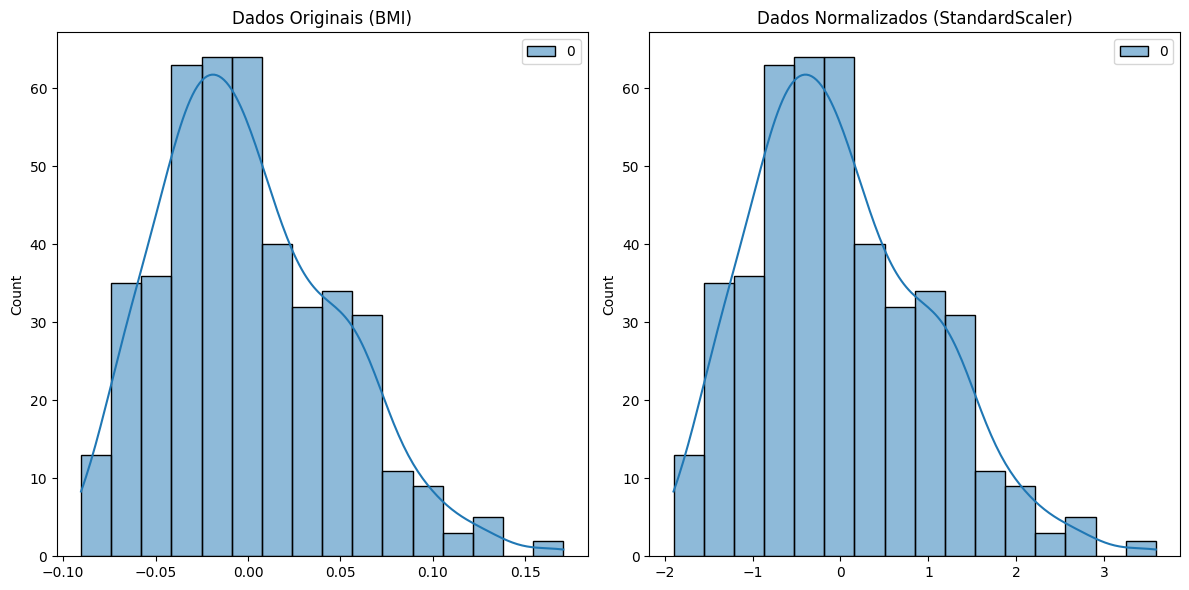

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Carregar dados de Diabetes
diabetes = load_diabetes()
data = diabetes.data
feature_index = 2  # por exemplo, o índice 2 corresponde à feature "bmi"
feature_data = data[:, feature_index].reshape(-1, 1)

# Aplicação do StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(feature_data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(feature_data, kde=True)
plt.title('Dados Originais (BMI)')

plt.subplot(1, 2, 2)
sns.histplot(data_standardized, kde=True)
plt.title('Dados Normalizados (StandardScaler)')

plt.tight_layout()
plt.show()

### 1.9 Utilizar a regularização norma-l2

#### Exemplo: Conjunto de dados de Câncer de Mama

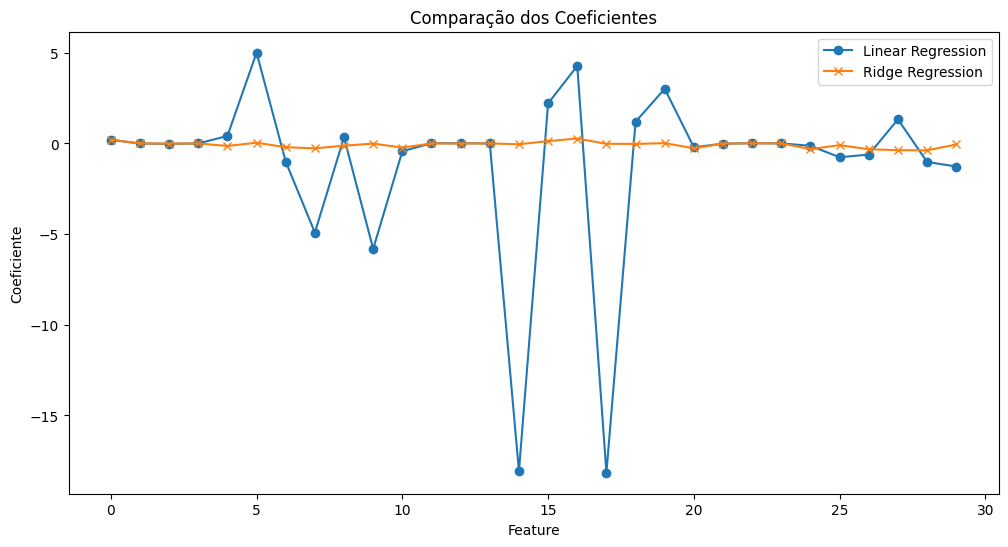

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação da Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Aplicação da Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Gráfico
coef_lr = model_lr.coef_
coef_ridge = model_ridge.coef_

plt.figure(figsize=(12, 6))
plt.plot(coef_lr, label='Linear Regression', marker='o')
plt.plot(coef_ridge, label='Ridge Regression', marker='x')
plt.title('Comparação dos Coeficientes')
plt.xlabel('Feature')
plt.ylabel('Coeficiente')
plt.legend()
plt.show()

### 1.10 Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

#### Wrapper com `RFE` e `LogisticRegression` no conjunto de dados de Câncer de Mama

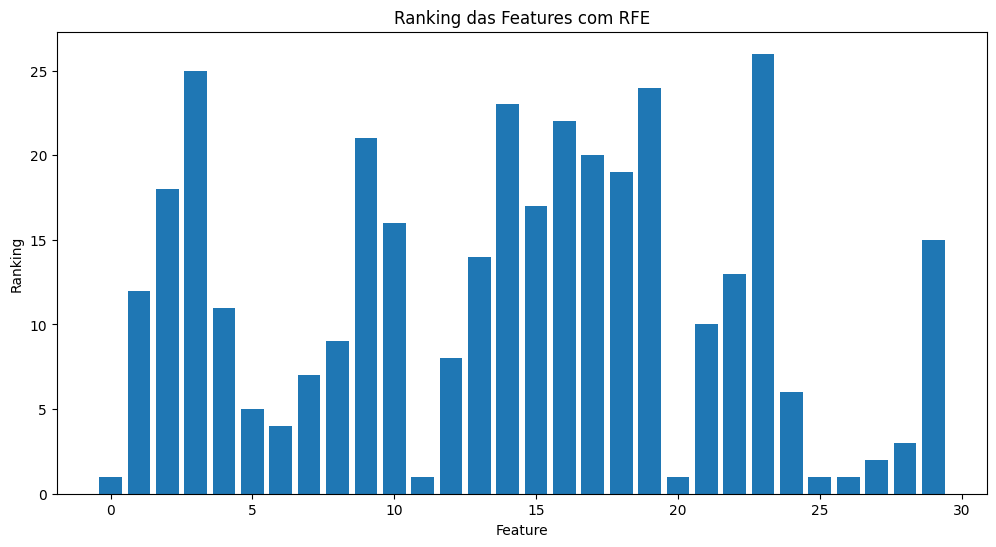

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Aplicação do RFE
model = LogisticRegression(max_iter=10000)
selector = RFE(model, n_features_to_select=5)
X_new = selector.fit_transform(X, y)

# Gráfico
ranking = selector.ranking_

plt.figure(figsize=(12, 6))
plt.bar(range(len(ranking)), ranking)
plt.title('Ranking das Features com RFE')
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.show()

#### Embedding com `RandomForestClassifier` no conjunto de dados de Câncer de Mama

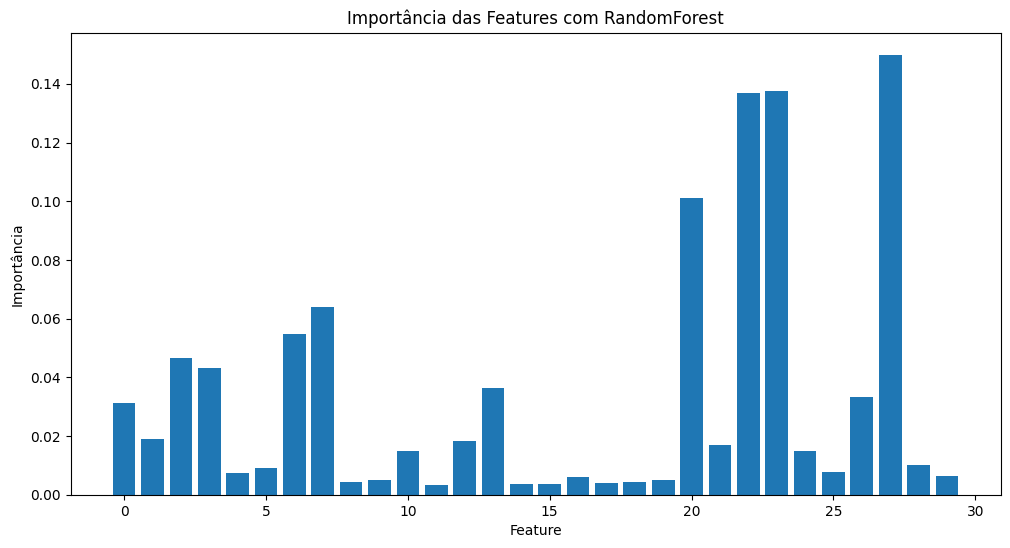

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Carregar dados de Câncer de Mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Aplicação do RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.title('Importância das Features com RandomForest')
plt.xlabel('Feature')
plt.ylabel('Importância')
plt.show()

### Conclusão

Os exemplos apresentados continuam a ilustrar como as técnicas de manipulação de dados numéricos afetam a distribuição e a seleção das features nos conjuntos de dados reais. Vamos finalizar a seção com mais explicações detalhadas e gráficos.

### Explicações Detalhadas

#### Discretização de variáveis contínuas por meio de quantização com bins variáveis

**Exemplo: Conjunto de dados de Diabetes**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Diabetes do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "bmi".
3. **Discretização com bins variáveis**: Usamos `pd.qcut` para dividir os dados em 10 bins com aproximadamente o mesmo número de pontos de dados.
4. **Plotagem**: Utilizamos um histograma para visualizar a distribuição dos dados discretizados.

#### Utilização da FunctionTransformer do sklearn em uma variável

**Exemplo: Conjunto de dados de Câncer de Mama (Aplicação de raiz quadrada)**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "mean radius".
3. **Transformação com raiz quadrada**: Definimos uma função para aplicar a raiz quadrada e usamos `FunctionTransformer` para aplicar a função aos dados.
4. **Plotagem**: Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

#### Utilização da PowerTransformer do sklearn em uma variável

**Exemplo: Comparação entre métodos 'yeo-johnson' e 'box-cox' no conjunto de dados de Diabetes**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Diabetes do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "bmi".
3. **Transformação com PowerTransformer**: Usamos `PowerTransformer` com os métodos 'yeo-johnson' e 'box-cox' para transformar os dados.
4. **Plotagem**: Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

#### Utilização da normalização Min-Max do sklearn

**Exemplo: Conjunto de dados de Câncer de Mama**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "mean radius".
3. **Normalização Min-Max**: Usamos `MinMaxScaler` para transformar os dados para a faixa entre 0 e 1.
4. **Plotagem**: Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

#### Utilização da normalização Standard Scaler

**Exemplo: Conjunto de dados de Diabetes**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Diabetes do `sklearn`.
2. **Seleção de uma feature contínua**: Selecionamos a feature "bmi".
3. **Normalização StandardScaler**: Usamos `StandardScaler` para transformar os dados para que tenham média 0 e desvio padrão 1.
4. **Plotagem**: Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

#### Utilização da regularização norma-l2

**Exemplo: Conjunto de dados de Câncer de Mama**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Divisão em treino e teste**: Dividimos os dados em conjuntos de treino e teste.
3. **Aplicação de Ridge e Linear Regression**: Aplicamos `LinearRegression` e `Ridge` com `alpha=1.0`.
4. **Plotagem**: Comparamos os coeficientes dos dois modelos em um gráfico.

#### Seleção das features úteis

**Filtragem com `SelectKBest` e ANOVA F-test**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Aplicação do SelectKBest**: Usamos `SelectKBest` com o teste ANOVA F para selecionar as 5 melhores features.
3. **Plotagem**: Visualizamos os scores das features em um gráfico de barras.

**Wrapper com `RFE` e `LogisticRegression`**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Aplicação do RFE**: Usamos `RFE` com `LogisticRegression` para selecionar as 5 melhores features.
3. **Plotagem**: Visualizamos o ranking das features em um gráfico de barras.

**Embedding com `RandomForestClassifier`**

1. **Carregamento dos dados**: Utilizamos o conjunto de dados de Câncer de Mama do `sklearn`.
2. **Aplicação do RandomForestClassifier**: Usamos `RandomForestClassifier` para treinar o modelo e extrair as importâncias das features.
3. **Plotagem**: Visualizamos as importâncias das features em um gráfico de barras.

### Conclusão

Os exemplos apresentados utilizam conjuntos de dados reais para demonstrar como as diferentes técnicas de manipulação de dados numéricos afetam a distribuição e a seleção das features nos conjuntos de dados. Cada técnica tem seu propósito específico e pode ser escolhida com base nas características dos dados e nos objetivos do modelo de machine learning.